In [53]:
import numpy as np
import pandas as pd

In [54]:
v=pd.read_csv("Updated_FAF.csv")


In [55]:
v=v.drop("Unnamed: 0",axis=1)

In [56]:
v=v.drop("curval_2012",axis=1)

In [83]:
df_faf2012=pd.read_csv("faf35_provisional_2012_state.csv")


In [85]:
df_faf2012

,fr_orig,dms_origst,dms_destst,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,value_2012,curval_2012,tons_2012,tmiles_2012
0,NaN,1,1,NaN,NaN,1,NaN,1,1,1298.4192,1301.1587,1206.1115,120.224158
1,NaN,1,1,NaN,NaN,1,NaN,2,1,485.9232,484.1869,2560.6566,239.806479
2,NaN,1,1,NaN,NaN,1,NaN,3,1,1031.4111,1028.2293,2799.1528,238.617660
3,NaN,1,1,NaN,NaN,1,NaN,4,1,753.1903,755.9042,3095.7776,276.934624
4,NaN,1,1,NaN,NaN,1,NaN,5,1,2130.6679,2133.1313,911.7455,67.068679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549127,808.0,53,56,NaN,5.0,1,NaN,26,2,0.0020,0.0023,0.0004,0.000396
549128,808.0,53,56,NaN,5.0,1,NaN,30,2,0.0025,0.0028,0.0001,0.000099
549129,808.0,53,56,NaN,5.0,1,NaN,33,2,0.0040,0.0044,0.0019,0.001882
549130,808.0,53,56,NaN,5.0,1,NaN,34,2,0.1869,0.2070,0.0347,0.033586


In [86]:
df_faf2012=df_faf2012.drop(["curval_2012"],axis=1)


In [87]:
df_faf2012=df_faf2012.fillna(0)

In [61]:
X = df_faf2012.drop("value_2012",axis=1)
y = df_faf2012["value_2012"]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred = LR.predict(X_test)
y_pred

array([ 89.28771694,  59.84633885,  18.96791746, ..., -28.91472958,
        15.25354306,  82.21674257])

In [65]:
residuals=y_test-y_pred


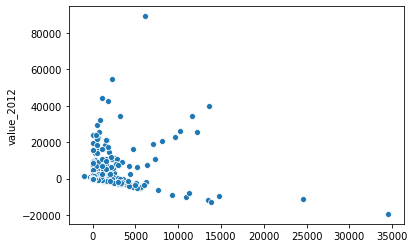

In [66]:
import seaborn as sns
sns.scatterplot(y_pred,residuals)

In [67]:
resid_mean=np.mean(residuals)
resid_std=np.std(residuals,ddof=1)
k=[]
for i in residuals:
    k.append(i/resid_std)

In [68]:
std_resid=np.array(k)

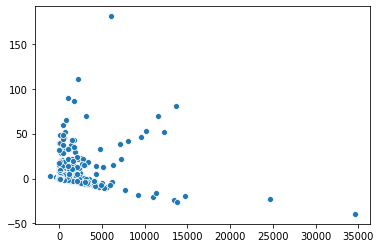

In [69]:
sns.scatterplot(y_pred,std_resid)

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data.otherwise, a non-linear model is more appropriate.Our residual plot shows a clear shape instead of randomly dispersed points which mean there is a specific patteren to the datset such as presence outliers which makes difficult to predict in linear regression

In [70]:
from sklearn.metrics import r2_score
from sklearn import metrics

print("Train score :",LR.score(X_train,y_train))
print("test score :",LR.score(X_test,y_test))
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",RMSE)
print("R_SQR: ",r2_score(y_test,y_pred))

Train score : 0.11519635787165451
test score : 0.18103540730700607
RMSE:  493.31207044339993
R_SQR:  0.18103540730700607


In [71]:
from sklearn import model_selection
kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=10)
CV_results=model_selection.cross_val_score(LR,X,y,cv=kfold,scoring="r2")

In [72]:
CV_results

array([0.18915371, 0.10905157, 0.12579418, 0.08131418, 0.17301407])

In [73]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)

In [74]:
df_faf2012=pd.read_csv("faf35_provisional_2012_state.csv")


In [75]:
df_faf2012=df_faf2012.fillna(0)

In [76]:
df_faf2012=df_faf2012.drop(["curval_2012"],axis=1)


In [77]:
df_faf2012.head(3)

,fr_orig,dms_origst,dms_destst,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,value_2012,tons_2012,tmiles_2012
0,0.0,1,1,0.0,0.0,1,0.0,1,1,1298.4192,1206.1115,120.224158
1,0.0,1,1,0.0,0.0,1,0.0,2,1,485.9232,2560.6566,239.806479
2,0.0,1,1,0.0,0.0,1,0.0,3,1,1031.4111,2799.1528,238.617660


In [78]:
X = df_faf2012.drop("value_2012",axis=1)
y = df_faf2012["value_2012"]

In [79]:
kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=7)
CV_results=model_selection.cross_val_score(regressor,X,y,cv=kfold,scoring="r2")

In [80]:
CV_results

array([0.67836253, 0.73545241, 0.75349708, 0.7819324 , 0.68928667])

In [29]:
print("AVerage BIAS ERROR",1-CV_results.mean())
print("AVerage variance ERROR",np.std(CV_results,ddof=1))

AVerage BIAS ERROR 0.2722937809171657
AVerage variance ERROR 0.04352157812084495


In [30]:
#SQRT TRANSFORMATION

In [31]:
X = df_faf2012.drop("value_2012",axis=1)
y = df_faf2012["value_2012"]
df_faf2012_Transform=df_faf2012[["value_2012","tons_2012","tmiles_2012"]]

In [32]:
df_faf2012_F=df_faf2012.iloc[:,0:9]

In [33]:
df_faf2012_Transform=df_faf2012_Transform.transform(func = ['sqrt'])

In [34]:
df_faf2012_Transform=pd.concat([df_faf2012_F,df_faf2012_Transform],axis=1)

In [35]:
df_faf2012_Transform.head(2)

,fr_orig,dms_origst,dms_destst,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,"(value_2012, sqrt)","(tons_2012, sqrt)","(tmiles_2012, sqrt)"
0,0.0,1,1,0.0,0.0,1,0.0,1,1,36.033584,34.729116,10.964678
1,0.0,1,1,0.0,0.0,1,0.0,2,1,22.043666,50.602931,15.485686


In [36]:
#df.rename(columns={"A": "a", "B": "c"})
df_faf2012_Transform=df_faf2012_Transform.rename(columns={('value_2012', 'sqrt'): "value_2012_sqrt",('tons_2012', 'sqrt'):"Tons_2012_sqrt",('tmiles_2012', 'sqrt'):"tmiles_2012_sqrt"})
import seaborn as sns
#sns.distplot(df_faf2012_Transform["(value_2012,sqrt)"])

In [37]:
df_faf2012_Transform.columns

Index(['fr_orig', 'dms_origst', 'dms_destst', 'fr_dest', 'fr_inmode',
       'dms_mode', 'fr_outmode', 'sctg2', 'trade_type', 'value_2012_sqrt',
       'Tons_2012_sqrt', 'tmiles_2012_sqrt'],
      dtype='object')

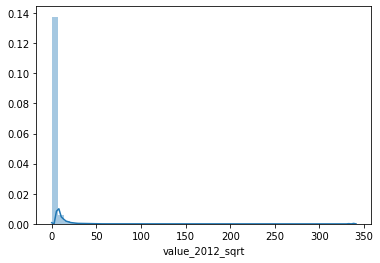

In [38]:
import seaborn as sns
sns.distplot(df_faf2012_Transform["value_2012_sqrt"])

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_faf2012_Transform.drop("value_2012_sqrt",axis=1)
y = df_faf2012_Transform["value_2012_sqrt"]
VIF_Columns =pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [40]:
VIF_Columns

fr_orig             17.505847
dms_origst           4.709623
dms_destst           4.565674
fr_dest             37.244149
fr_inmode            7.298410
dms_mode             2.940817
fr_outmode           8.898998
sctg2                4.384901
trade_type          73.833570
Tons_2012_sqrt       2.922923
tmiles_2012_sqrt     3.097737
dtype: float64

In [41]:
kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=7)
CV_results=model_selection.cross_val_score(regressor,X,y,cv=kfold,scoring="r2")

In [42]:
CV_results

array([0.86983284, 0.86278488, 0.87270068, 0.87091306, 0.85982514])

In [43]:
print("AVerage BIAS ERROR",1-CV_results.mean())
print("AVerage variance ERROR",np.std(CV_results,ddof=1))

AVerage BIAS ERROR 0.13278867981736975
AVerage variance ERROR 0.0055869813717196555


#####  Removing the HIgh multicollinearity columns

In [44]:
X = df_faf2012.drop(["value_2012","trade_type","fr_dest"],axis=1)#Removing top 2 feautres 
y = df_faf2012["value_2012"]

In [45]:
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=7)
CV_results=model_selection.cross_val_score(regressor,X,y,cv=kfold,scoring="r2")

In [46]:
print("AVerage BIAS ERROR",1-CV_results.mean())
print("AVerage variance ERROR",np.std(CV_results,ddof=1))

AVerage BIAS ERROR 0.2924956017440802
AVerage variance ERROR 0.048148037852191426


###### Removing only one feautre(highest multicollinearity column)

In [47]:
X = df_faf2012.drop(["value_2012","fr_dest"],axis=1)#Removing top 1 feautres 
y = df_faf2012["value_2012"]

In [48]:
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=7)
CV_results=model_selection.cross_val_score(regressor,X,y,cv=kfold,scoring="r2")

In [49]:
CV_results

array([0.6447387 , 0.69780362, 0.73644787, 0.78344629, 0.70777661])

In [50]:
print("AVerage BIAS ERROR",1-CV_results.mean())
print("AVerage variance ERROR",np.std(CV_results,ddof=1))

AVerage BIAS ERROR 0.28595738263664905
AVerage variance ERROR 0.05105111690522089


###### Selecting Best N-estimators

In [51]:
X = df_faf2012.drop(["value_2012"],axis=1)
y = df_faf2012["value_2012"]

In [89]:
values=[]
reg_bias=[]
reg_var=[]
for val in np.arange(1,15):
    regressor=RandomForestRegressor(n_estimators=val,random_state=0)
    kfold=model_selection.KFold(n_splits=15,shuffle=True,random_state=5)
    cv_results=model_selection.cross_val_score(regressor,X,y,scoring="r2",cv=kfold)
    reg_bias.append(1-np.mean(cv_results))
    reg_var.append(np.std(CV_results,ddof=1))
    values.append(val)
    
GBC_bias=pd.DataFrame({"Estimators":values,"B.E":reg_bias})
GBC_reg=pd.DataFrame({"Estimators":values,"B.E":reg_var})

In [ ]:
regressor=RandomForestRegressor(n_estimators=15,random_state=0)
kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=7)
CV_results=model_selection.cross_val_score(regressor,X,y,cv=kfold,scoring="r2")

In [90]:
GBC_reg

,Estimators,B.E
0,1,0.043522
1,2,0.043522
2,3,0.043522
3,4,0.043522
4,5,0.043522
5,6,0.043522
6,7,0.043522
7,8,0.043522
8,9,0.043522
9,10,0.043522


In [91]:
GBC_bias

,Estimators,B.E
0,1,0.531818
1,2,0.360860
2,3,0.318950
3,4,0.322287
4,5,0.287453
5,6,0.280534
6,7,0.269470
7,8,0.273017
8,9,0.262001
9,10,0.250218


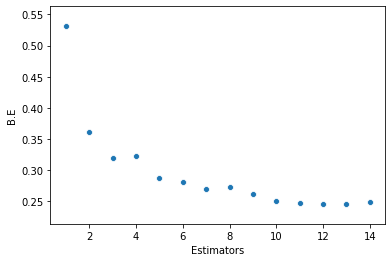

In [92]:
sns.scatterplot(x="Estimators", y="B.E", data=GBC_bias)

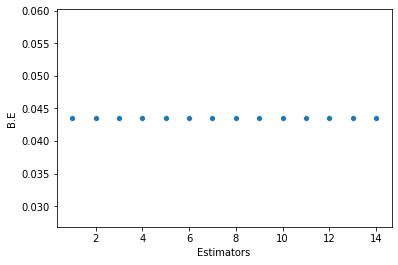

In [93]:
sns.scatterplot(x="Estimators", y="B.E", data=GBC_reg)

In [94]:
 GBC_bias['B.E'].min()

0.2449001711171589

In [95]:
GBC_bias[GBC_bias['B.E']== GBC_bias['B.E'].min()]

,Estimators,B.E
11,12,0.2449


In [96]:
GBC_reg[GBC_reg['B.E']== GBC_reg['B.E'].min()]

,Estimators,B.E
0,1,0.043522
1,2,0.043522
2,3,0.043522
3,4,0.043522
4,5,0.043522
5,6,0.043522
6,7,0.043522
7,8,0.043522
8,9,0.043522
9,10,0.043522


Since variance error does not vary much we can focus on the bias error, which shows minimum when the estimators is equal to 12

In [97]:
regressor=RandomForestRegressor(n_estimators=12,random_state=0)
kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=7)
CV_results=model_selection.cross_val_score(regressor,X,y,cv=kfold,scoring="r2")

In [123]:
CV_results.mean()

0.8699254220873553

In [82]:
df_faf2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549132 entries, 0 to 549131
Data columns (total 12 columns):
fr_orig        549132 non-null float64
dms_origst     549132 non-null int64
dms_destst     549132 non-null int64
fr_dest        549132 non-null float64
fr_inmode      549132 non-null float64
dms_mode       549132 non-null int64
fr_outmode     549132 non-null float64
sctg2          549132 non-null int64
trade_type     549132 non-null int64
value_2012     549132 non-null float64
tons_2012      549132 non-null float64
tmiles_2012    549132 non-null float64
dtypes: float64(7), int64(5)
memory usage: 50.3 MB
